Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}


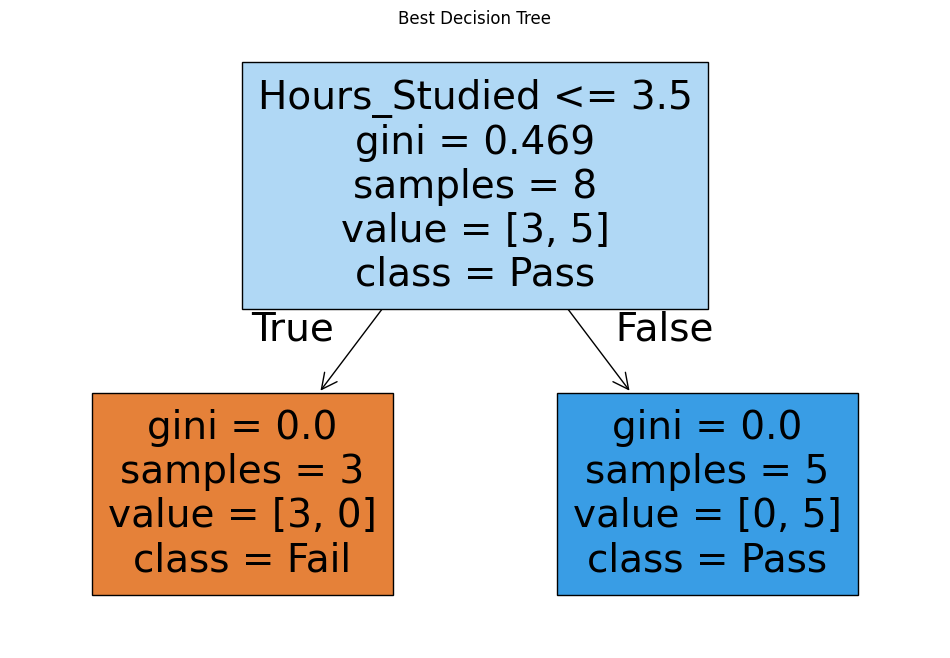

In [1]:
import pandas as pd

data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 1, 4, 2, 5, 6, 7],
    'Attendance':     [30, 40, 50, 60, 70, 80, 20, 65, 45, 75, 85, 90],
    'Coaching':       [0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1],
    'Sleep_Hours':    [4, 5, 6, 5, 7, 8, 4, 6, 5, 7, 6, 8],
    'Health_Score':   [50, 60, 70, 60, 80, 90, 40, 65, 55, 75, 85, 95],
    'Passed':         [0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1]
}

df = pd.DataFrame(data)
df.head()

X = df.drop("Passed", axis=1)
y = df["Passed"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)


from sklearn.metrics import accuracy_score, classification_report

y_pred = dt.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3)
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

best_tree = grid.best_estimator_

plt.figure(figsize=(12, 8))
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=["Fail", "Pass"])
plt.title("Best Decision Tree")
plt.show()

